In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [2]:
cifar10_data = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10_data.load_data()

In [3]:
class_names = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

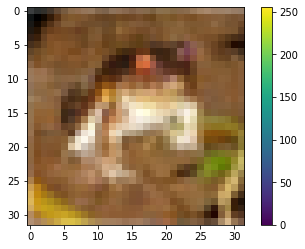

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

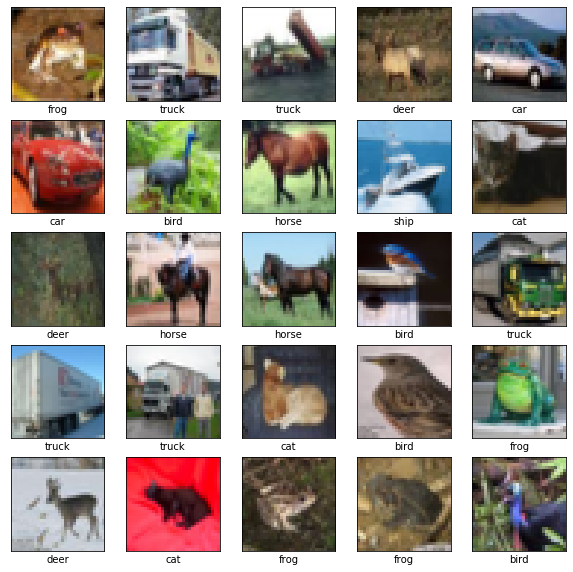

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])
model = keras.applications.VGG16(include_top=False, input_shape=(32, 32, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [10]:
model = keras.Sequential([model,
                         keras.layers.Flatten(),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10)])

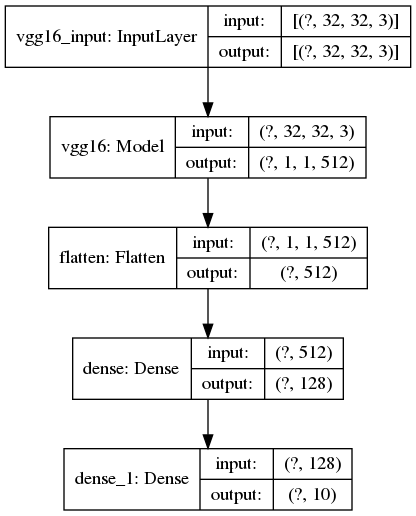

In [11]:
keras.utils.plot_model(model, show_shapes=True)

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(train_images, train_labels, epochs=15)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.8562 - acc: 0.2488
Epoch 2/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.4420 - acc: 0.4461
Epoch 3/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.1397 - acc: 0.5947
Epoch 4/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9490 - acc: 0.6691
Epoch 5/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.8361 - acc: 0.7158
Epoch 6/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.7339 - acc: 0.7519
Epoch 7/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.6726 - acc: 0.7765
Epoch 8/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.6013 - acc: 0.8019
Epoch 9/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.5424 - acc: 0.8218
Epoch 10/15
50000/50000 [==============================] - 

In [15]:
model.save('vgg16.h5')

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 4s - loss: 0.7710 - acc: 0.7880

Test accuracy: 0.788


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([-1.6911557,  2.1370533, -1.1258453,  2.5687826, -1.8343588,
        1.7711805,  1.2503036, -1.188685 , -1.7392462,  2.5915558],
      dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

array([3], dtype=uint8)

In [18]:
np.max(predictions[0]) * 100

259.15558338165283

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

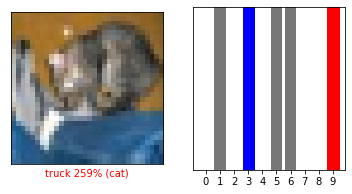

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

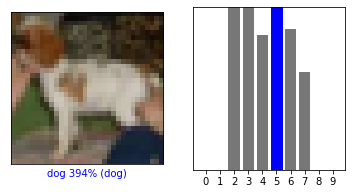

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

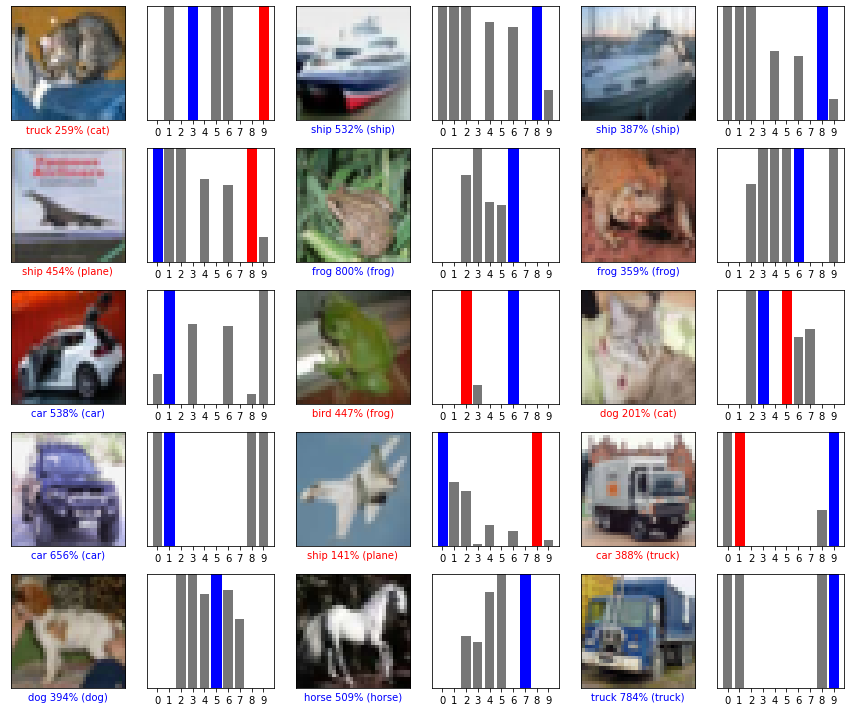

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[  4.8497643   1.5515723  -5.824355   -4.537268   -8.200779   -9.462905
   -7.491384  -22.547752   18.107222   -2.0125527]]


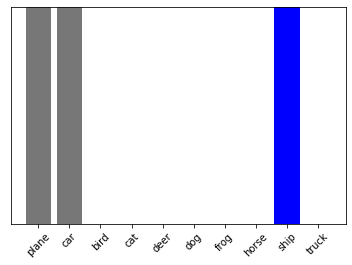

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

8